I ran the following simulation:

```
generate_gwas_from_experiment.nf --geno datasets/genesis/genesis.processed --snp2gene datasets/genesis/snp2hgnc.tsv --net gm --tab datasets/genesis/BIOGRID-ORGANISM-Homo_sapiens.4.138.tab.txt --genewawd /data/users/hcliment/projects/genewa --h2 1 -resume
```

It simulates 100 causal SNPs, then simulates a phenotype with an heritability h<sup>2</sup>=1.

In [1]:
library(tidyverse)
library(cowplot)
load("h1/qualityMeasures.RData")

options(repr.plot.width = 6, repr.plot.height = 5)

qMeasures <- qMeasures %>%
    mutate(Algorithm = ifelse(grepl("evo", model), "evo", "LASSO"),
           Algorithm = ifelse(grepl("scones", model), "SConES", Algorithm),
           Model_selection = gsub("evo.chi2.", "", model))

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats

Attaching package: ‘cowplot’

The following object is masked from ‘package:ggplot2’:

    ggsave



# Quality measures

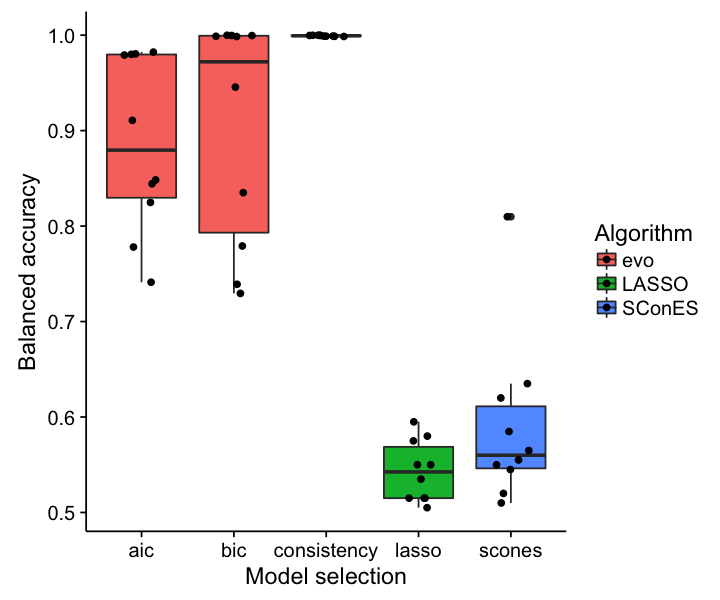

In [2]:
ggplot(qMeasures, aes(x = Model_selection, y = BalancedAccuracy, fill = Algorithm)) + 
    geom_boxplot() +
    geom_jitter(width = 0.2) +
    labs(x = "Model selection", y = "Balanced accuracy")

`evo` returns an almost perfect balanced accuracy.

In [3]:
qMeasures %>%
    group_by(Algorithm, Model_selection) %>%
    summarise(Mean = mean(Specificity),
              Median = median(Specificity)) %>%
    t

Algorithm,evo,evo,evo,LASSO,SConES
Model_selection,aic,bic,consistency,lasso,scones
Mean,0.9738469,0.9969646,0.9986728,0.9999729,0.9998754
Median,0.9738229,0.9981820,0.9987157,0.9999745,0.9999464


Due to most of the SNPs being non-associated, specificity is really high in all cases.

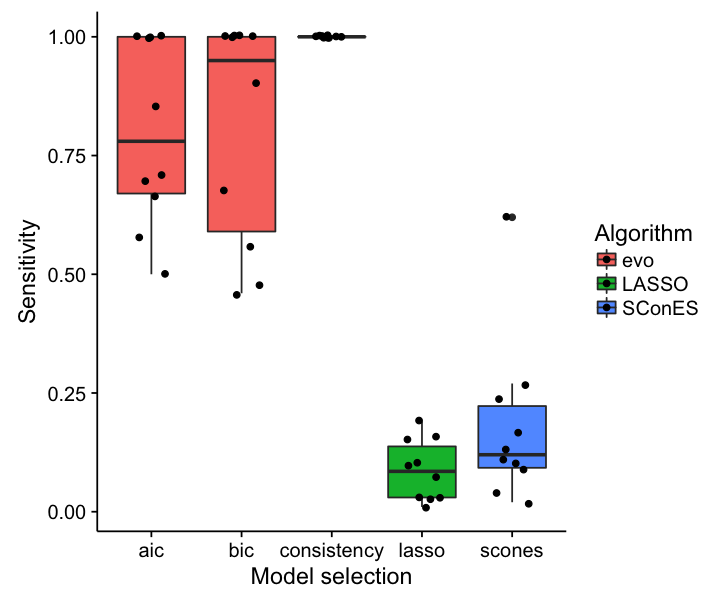

In [4]:
ggplot(qMeasures, aes(x = Model_selection, y = Sensitivity, fill = Algorithm)) + 
    geom_boxplot() + 
    geom_jitter(width = 0.2) +
    labs(x = "Model selection")

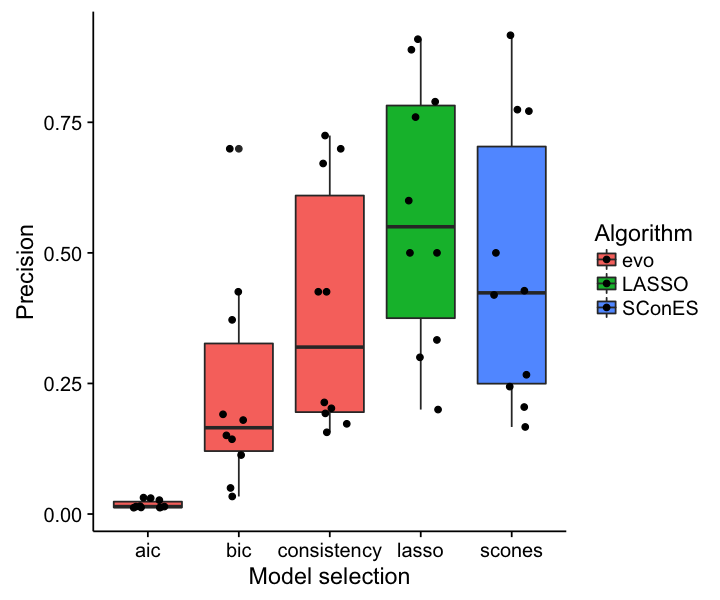

In [5]:
ggplot(qMeasures, aes(x = Model_selection, y = Precision, fill = Algorithm)) + 
    geom_boxplot() + 
    geom_jitter(width = 0.2) +
    labs(x = "Model selection")

`evo`'s worst feature is the ammount of false positives. Possibly the χ<sup>2</sup> is more sensitive than SKAT, that alone explains everything. TODO COMPARE SKAT to CHISQ.

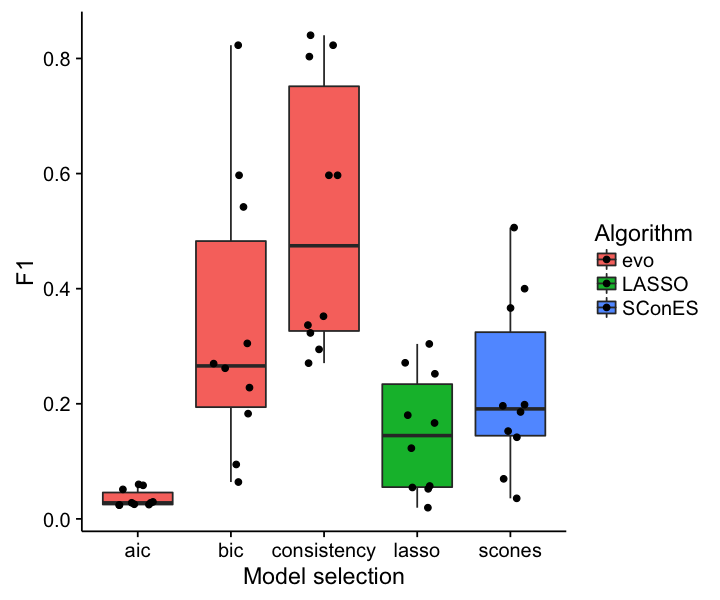

In [6]:
ggplot(qMeasures, aes(x = Model_selection, y = F1, fill = Algorithm)) + 
    geom_boxplot() +
    geom_jitter(width = 0.2) +
    labs(x = "Model selection")

# Runtime

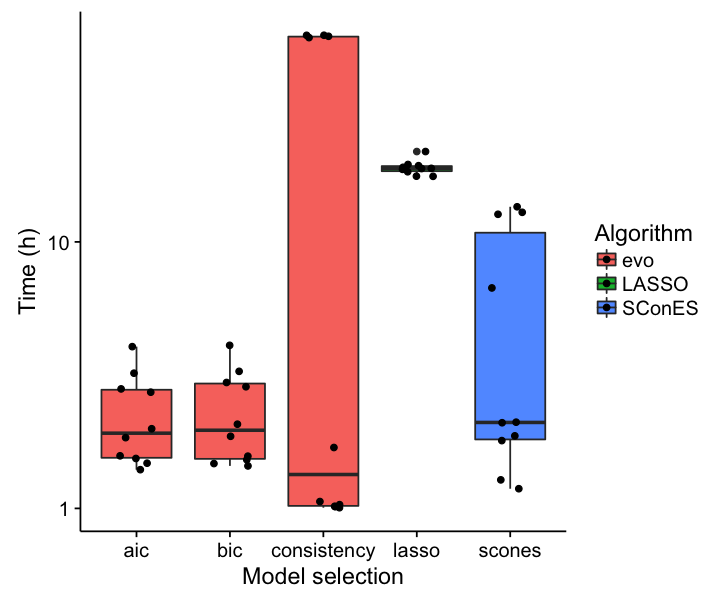

In [7]:
ggplot(qMeasures, aes(x = Model_selection, y = as.numeric(time), fill = Algorithm)) + 
    geom_boxplot() +
    geom_jitter(width = 0.2) +
    scale_y_log10() +
    labs(x = "Model selection", y = "Time (h)")

LASSO is clearly more inefficient, and `evo` is more efficient that SConES in all its instances.